# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [95]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
#sets the base url and parameters to retrieve city info from weather api
base_url="http://api.openweathermap.org/data/2.5/weather?"
params={"q":"Avarua", "appid":weather_api_key}

cities_raw_data=[]#stores all the data from the cities

#prints the header for the results
print()
print("Data Retrieval")
print("-------------------")

#loops through all of the cities, getting requests from weather api for each
for i, city in enumerate(cities):
    print(f"Processing Record {i}: {city}")
    try:
        params["q"]=city#updates the city for the search
        weather_response=requests.get(base_url, params=params).json()
        cities_raw_data.append(weather_response)#stores the city in the list
    except:
        print(f"Unable to process data for {city}.")



Data Retrieval
-------------------
Processing Record 0: busselton
Processing Record 1: kapaa
Processing Record 2: isangel
Processing Record 3: soyo
Processing Record 4: khani
Processing Record 5: vostok
Processing Record 6: provideniya
Processing Record 7: cherskiy
Processing Record 8: jamestown
Processing Record 9: rikitea
Processing Record 10: belushya guba
Processing Record 11: jabinyanah
Processing Record 12: klaksvik
Processing Record 13: quatre cocos
Processing Record 14: hereford
Processing Record 15: aklavik
Processing Record 16: matay
Processing Record 17: albany
Processing Record 18: torbay
Processing Record 19: vaini
Processing Record 20: bethel
Processing Record 21: cape town
Processing Record 22: avarua
Processing Record 23: bredasdorp
Processing Record 24: bluff
Processing Record 25: chokurdakh
Processing Record 26: butaritari
Processing Record 27: ushuaia
Processing Record 28: bumba
Processing Record 29: urdzhar
Processing Record 30: nanortalik
Processing Record 31: tah

Processing Record 255: yulara
Processing Record 256: yerbogachen
Processing Record 257: vilcun
Processing Record 258: carutapera
Processing Record 259: aruppukkottai
Processing Record 260: nemuro
Processing Record 261: petropavlovsk-kamchatskiy
Processing Record 262: sao filipe
Processing Record 263: kahului
Processing Record 264: akureyri
Processing Record 265: norman wells
Processing Record 266: akyab
Processing Record 267: pevek
Processing Record 268: padang
Processing Record 269: skalistyy
Processing Record 270: progreso
Processing Record 271: naze
Processing Record 272: ambilobe
Processing Record 273: piskavica
Processing Record 274: naantali
Processing Record 275: mendoza
Processing Record 276: kjollefjord
Processing Record 277: guerrero negro
Processing Record 278: alofi
Processing Record 279: atar
Processing Record 280: talakan
Processing Record 281: port hardy
Processing Record 282: evensk
Processing Record 283: roanoke rapids
Processing Record 284: kirakira
Processing Record 

Processing Record 510: warqla
Processing Record 511: marathon
Processing Record 512: les cayes
Processing Record 513: young
Processing Record 514: moshenskoye
Processing Record 515: labytnangi
Processing Record 516: jaciara
Processing Record 517: baturaja
Processing Record 518: praia
Processing Record 519: ilongero
Processing Record 520: mezhdurechensk
Processing Record 521: tazovskiy
Processing Record 522: barbar
Processing Record 523: santa fe
Processing Record 524: araouane
Processing Record 525: scottsburgh
Processing Record 526: kasongo
Processing Record 527: jalu
Processing Record 528: haigerloch
Processing Record 529: hofn
Processing Record 530: palmer
Processing Record 531: riviere-au-renard
Processing Record 532: aksu
Processing Record 533: uyuni
Processing Record 534: la palma
Processing Record 535: umm durman
Processing Record 536: sur
Processing Record 537: indramayu
Processing Record 538: maturin
Processing Record 539: prainha
Processing Record 540: plettenberg bay
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
#creates a dictionary to store only relevant information
cities_key_info={'City':[],
                'Lat':[],
                'Lng':[],
                'Max Temp':[],
                'Humidity':[],
                'Cloudiness':[],
                'Wind Speed':[],
                'Country':[],
                'Date':[]}

#loops through the raw data of the cities, storing information of interest in the dictionary
for j in range(len(cities_raw_data)-1):
    try:
        cities_key_info['City'].append(cities_raw_data[j]['name'])
        cities_key_info['Lat'].append(cities_raw_data[j]['coord']['lat'])
        cities_key_info['Lng'].append(cities_raw_data[j]['coord']['lon'])
        cities_key_info['Max Temp'].append(cities_raw_data[j]['main']['temp_max'])
        cities_key_info['Humidity'].append(cities_raw_data[j]['main']['humidity'])
        cities_key_info['Cloudiness'].append(cities_raw_data[j]['clouds']['all'])
        cities_key_info['Wind Speed'].append(cities_raw_data[j]['wind']['speed'])
        cities_key_info['Country'].append(cities_raw_data[j]['sys']['country'])
        cities_key_info['Date'].append(cities_raw_data[j]['dt'])
    except:
        pass #if city isn't found keep moving

cities_df=pd.DataFrame(cities_key_info)#creates a dataframe from the information
cities_df.to_csv("../output_data/cities_weathers.csv", index=False)#outputs to csv file
print(f'Number of cities with data: {len(cities_df)}')
cities_df.head()#prints sample response

Number of cities with data: 530


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,285.93,95,8,2.13,AU,1619370634
1,Kapaa,22.0752,-159.3190,296.15,78,75,5.14,US,1619370650
2,Isangel,-19.5500,169.2667,298.12,81,100,4.61,VU,1619370667
3,Soyo,-6.1349,12.3689,299.94,79,47,3.35,AO,1619370672
4,Khani,41.9563,42.9566,286.15,76,75,4.63,GE,1619370673


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
#reads the data from newly created csv to keep data consistent
csv_path="../output_data/cities_weathers.csv"
weather_csv_df=pd.read_csv(csv_path)

#converts weather column to fahrenheit
weather_csv_df["Max Temp"]=round((weather_csv_df["Max Temp"]-273.15)*(9/5)+32,1)

In [51]:
#looks for cities with 100% humidity and put them into new df
humid_cities_pd=weather_csv_df.loc[(weather_csv_df['Humidity'] > 100)]

#outputs the number of cities with over 100 % humidity
print(f"There are {len(humid_cities_pd)} city/cities with humidity over 100%")

There are 0 city/cities with humidity over 100%


In [44]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:

#There are no cities in my csv with over 100% humidity, so skipping the above step.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

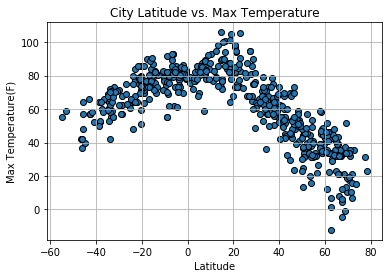

In [3]:
#reads the data from newly created csv to keep data consistent
csv_path="../output_data/cities_weathers.csv"
weather_csv_df=pd.read_csv(csv_path)

#converts weather column to fahrenheit 
weather_csv_df["Max Temp"]=round((weather_csv_df["Max Temp"]-273.15)*(9/5)+32,1)

#gets the values for the graph
lat_city=weather_csv_df['Lat']
temp_city=weather_csv_df['Max Temp']

#labels the graph
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(lat_city,temp_city,edgecolors="black")

#outputs the graph
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

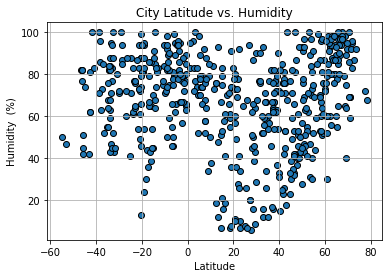

In [5]:
#gets the values for the graph
lat_city=weather_csv_df['Lat']
temp_city=weather_csv_df['Humidity']

#labels the graph
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity  (%)")
plt.scatter(lat_city,temp_city,edgecolors="black")

#outputs the graph
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

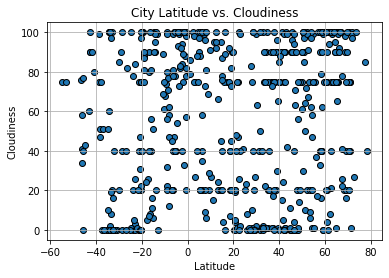

In [6]:
#gets the values for the graph
lat_city=weather_csv_df['Lat']
temp_city=weather_csv_df['Cloudiness']

#labels the graph
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(lat_city,temp_city,edgecolors="black")

#outputs the graph
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

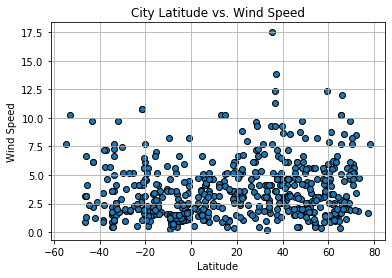

In [7]:
#gets the values for the graph
lat_city=weather_csv_df['Lat']
temp_city=weather_csv_df['Wind Speed']

#labels the graph
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(lat_city,temp_city,edgecolors="black")

#outputs the graph
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


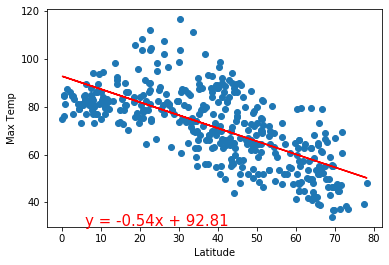

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


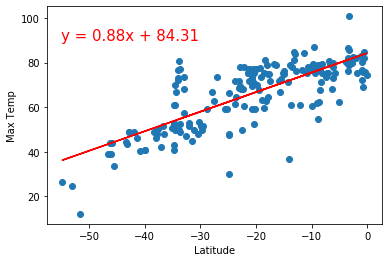

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


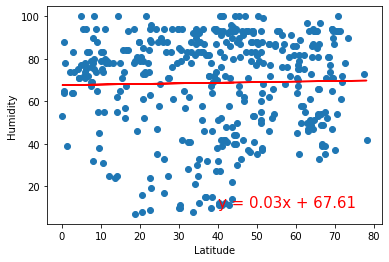

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


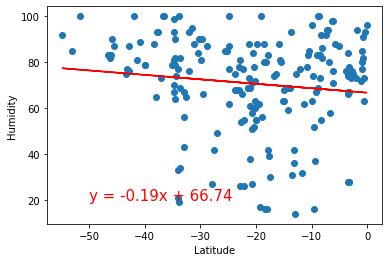

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


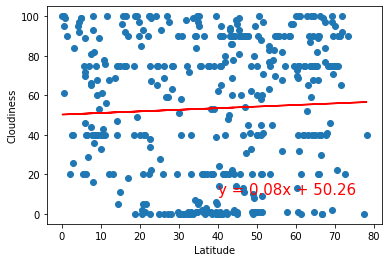

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


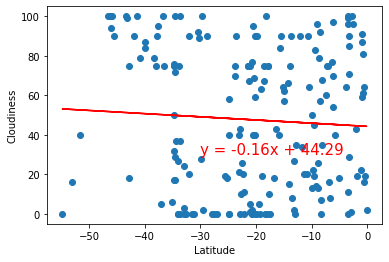

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


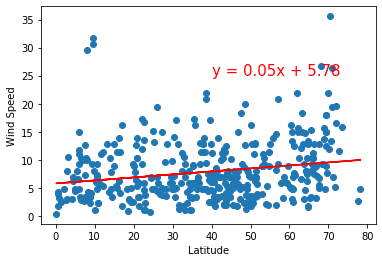

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


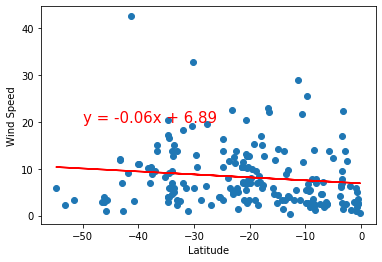